In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

value = [1, 2]'),
 Text(154.1343396226415, 92.412, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(156.6611320754717, 103.28399999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(159.1879245283019, 114.156, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(161.71471698113209, 125.02799999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(173.7169811320755, 135.9, 'X[4] <= 29.1\nentropy = 0.925\nsamples = 97\nvalue = [64, 33]'),
 Text(171.1901886792453, 125.02799999999999, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(176.24377358490568, 125.02799999999999, 'X[4] <= 30.598\nentropy = 0.954\nsamples = 88\nvalue = [55, 33]'),
 Text(164.24150943396228, 114.156, 'X[1] <= 28.5\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(161.71471698113209, 103.28399999999999, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(166.76830188679247, 103.28399999999999, 'X[4] <= 30.285\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(164.24150943396228, 92.

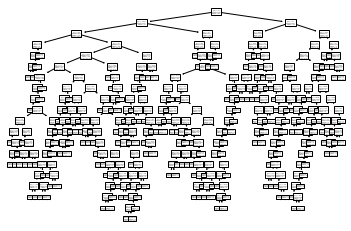

In [10]:
tree.plot_tree(clf.fit(X, y), )

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.shape

(596, 10)

In [14]:
X_test.shape

(295, 10)

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.score(X_test, y_test)

0.7694915254237288

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [19]:
clf.score(X_test, y_test)

0.8203389830508474

# Кросс-валидация

In [23]:
max_depth_values = range(1, 100)

In [24]:
scores_data = pd.DataFrame()

In [26]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score]
        })
    
    scores_data = scores_data.append(temp_score_data)

In [27]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [35]:
scores_data_long = pd.melt(
    scores_data,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score'],
    var_name='set_type',
    value_name='score')

In [36]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


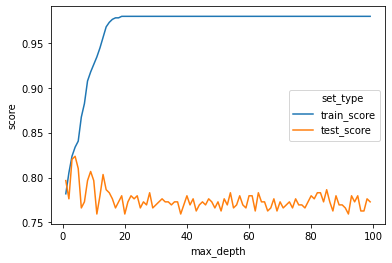

In [37]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)